**翻译也可以看作一个向量空间的转换**

例如: **XR = Y**, **X**代表英文word vector, **Y**代表法语 word vector, **R**代表映射矩阵

# Vector manipulation in Python

In this lab, you will have the opportunity to practice once again with the NumPy library. This time, we will explore some advanced operations with arrays and matrices.

At the end of the previous module, we used PCA to transform a set of many variables into a set of only two uncorrelated variables. This process was made through a transformation of the data called rotation. 

In this week's assignment, you will need to find a transformation matrix from English to French vector space embeddings. Such a transformation matrix is nothing else but a matrix that rotates and scales vector spaces.

In this notebook, we will explain in detail the rotation transformation. 

## Transforming vectors

There are three main vector transformations:
* Scaling
* Translation
* Rotation

In previous notebooks, we have applied the first two kinds of transformations. Now, let us learn how to use a fundamental transformation on vectors called _rotation_.

The rotation operation changes the direction of a vector, letting unaffected its dimensionality and its norm. Let us explain with some examples. 

In the following cells, we will define a NumPy matrix and a NumPy array. Soon we will explain how this is related to matrix rotation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    """Procedure to plot and arrows that represents vectors with pyplot"""
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        x_dir.append(vec[0][0])
        y_dir.append(vec[0][1])
    
    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax == None:
        plt.show()
        fig.savefig(fname)


## Example 1

In [6]:
R = np.array([[2, 0], [0, -2]])

In [8]:
x=np.array([[1, 1]])

The dot product between a vector and a square matrix produces a rotation and a scaling of the original vector. 

Remember that our recommended way to get the dot product in Python is np.dot(a, b):

In [9]:
y=np.dot(x, R)
y

array([[ 2, -2]])

We are going to use Pyplot to inspect the effect of the rotation on 2D vectors visually. For that, we have created a function `plot_vectors()` that takes care of all the intricate parts of the visual formatting. The code for this function is inside the `utils_nb.py` file. 

Now we can plot the vector $\vec x = [1, 1]$ in a cartesian plane. The cartesian plane will be centered at `[0,0]` and its x and y limits will be between `[-4, +4]`

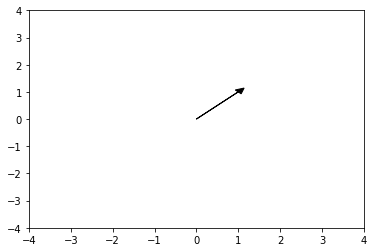

In [11]:
plot_vectors([x], axes=[4, 4], fname='transform_x.svg')

Now, let's plot in the same system our vector $\vec x = [1, 1]$ and its dot product with the matrix

$$Ro = \begin{bmatrix} 2 & 0 \\ 0 & -2 \end{bmatrix}$$

$$y = x \cdot Ro = [[-2, 2]]$$

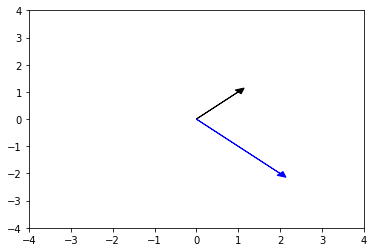

In [12]:
plot_vectors([x, y], axes=[4, 4], fname='transformx_and_y.svg')

### Example 2

We are going to use Pyplot to inspect the effect of the rotation on 2D vectors visually. For that, we have created a function that takes care of all the intricate parts of the visual formatting. The following procedure plots an arrow within a Pyplot canvas.

Data that is composed of 2 real attributes is telling to belong to a $ RxR $ or $ R^2 $ space. Rotation matrices in $R^2$ rotate a given vector $\vec x$ by a counterclockwise angle $\theta$ in a fixed coordinate system. Rotation matrices are of the form:

$$Ro = \begin{bmatrix} cos \theta & -sin \theta \\ sin \theta & cos \theta \end{bmatrix}$$

The trigonometric functions in Numpy require the angle in radians, not in degrees. In the next cell, we define a rotation matrix that rotates vectors by $45^o$.

In [13]:
angle = 100 * (np.pi / 180)  # convert degrees to radians

Ro = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

x2 = np.array([2, 2]).reshape(1, -1)  # make it a row vector
y2 = np.dot(x2, Ro)

print('Rotation matrix')
print(Ro)
print('\nRotated vector')
print(y2)

print('\n x2 norm', np.linalg.norm(x2))
print('\n y2 norm', np.linalg.norm(y2))
print('\n Rotation matrix norm', np.linalg.norm(Ro))

Rotation matrix
[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]

Rotated vector
[[ 1.62231915 -2.31691186]]

 x2 norm 2.8284271247461903

 y2 norm 2.82842712474619

 Rotation matrix norm 1.414213562373095


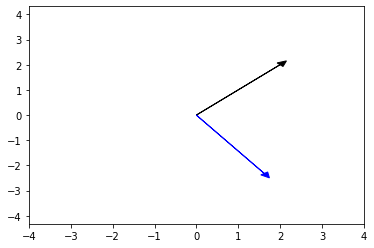

In [14]:
plot_vectors([x2, y2], fname='transform_02.svg')

Some points to note:

* The norm of the input vector is the same as the norm of the output vector. Rotations matrices do not modify the norm of the vector, only its direction.
* The norm of any $R^2$ rotation matrix is always $\sqrt 2 = 1.414221$

## Frobenius Norm

The Frobenius norm is the generalization to $R^2$ of the already known norm function for vectors 

$$\| \vec a \| = \sqrt {{\vec a} \cdot {\vec a}} $$

For a given $R^2$ matrix A, the frobenius norm is defined as:

$$\|\mathrm{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}$$


In [16]:
A = np.array([[2, 2],
              [2, 2]])

`np.square()` is a way to square each element of a matrix. It must be equivalent to use the * operator in Numpy arrays.

In [17]:
A_squared = np.square(A)
A_squared

array([[4, 4],
       [4, 4]])

Now you can sum over the elements of the resulting array, and then get the square root of the sum.

In [18]:
A_Frobenius = np.sqrt(np.sum(A_squared))
A_Frobenius

4.0

That was the extended version of the `np.linalg.norm()` function. You can check that it yields the same result.

In [19]:
print('Frobenius norm of the Rotation matrix')
print(np.sqrt(np.sum(Ro * Ro)), '== ', np.linalg.norm(Ro))

Frobenius norm of the Rotation matrix
1.414213562373095 ==  1.414213562373095


**Congratulations!! We've covered a few more matrix operations in this lab. This will come in handy in this week's programming assignment!**

# Hash functions and multiplanes


In this lab, we are going to practice the most important concepts related to the hash functions explained in the videos. You will be using these in this week's assignment.

A key point for the lookup using hash functions is the calculation of the hash key or bucket id that we assign for a given entry. In this notebook, we will cover:

* Basic hash tables
* Multiplanes
* Random planes

## Basic Hash tables

Hash tables are data structures that allow indexing data to make lookup tasks more efficient. 
In this part, you will see the implementation of the simplest hash function.

In [23]:
import numpy as np
import pprint
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In the next cell, we will define a straightforward hash function for integer numbers. The function will receive a list of integer numbers and the desired amount of buckets. The function will produce a hash table stored as a dictionary, where keys contain the hash keys, and the values will provide the hashed elements of the input list. 

The hash function is just the remainder of the integer division between each element and the desired number of buckets.

In [24]:
def basic_hash_table(value_1, n_buckets):
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)}
    
    for value in values_1:
        hash_value = hash_function(value, n_buckets)
        hash_table[hash_value].append(value)
        
    return hash_table

Now let's see the hash table function in action. The pretty print function (`pprint()`) will produce a visually appealing output. 

In [26]:
values_1 = [100,10,14,17,97]
hash_table_ex = basic_hash_table(values_1, n_buckets=10)
pp.pprint(hash_table_ex)
# hash_table_ex

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


In this case, the bucket key must be the rightmost digit of each number.

## Planes

Multiplanes hash functions are other types of hash functions. Multiplanes hash functions are based on the idea of numbering every single region that is formed by the intersection of n planes. In the following code, we show the most basic forms of the multiplanes principle. First, with a single plane:

In [27]:
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        x_dir.append(vec[0][0])
        y_dir.append(vec[0][1])
    
    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax == None:
        plt.show()
        fig.savefig(fname)

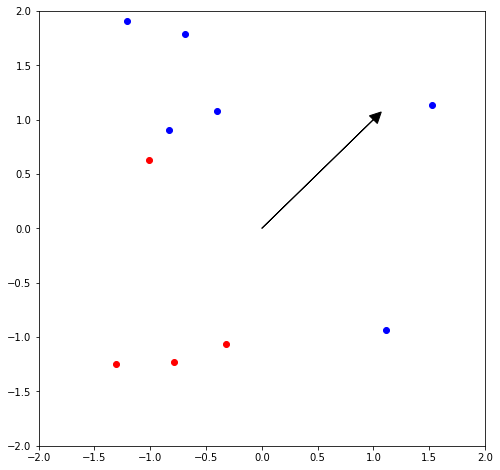

In [28]:
P = np.array([[1, 1]]) # Define a single plane. 
fig, ax1 = plt.subplots(figsize=(8, 8)) # Create a plot

plot_vectors([P], axes=[2, 2], ax=ax1) # Plot the plane P as a vector

# Plot  random points. 
for i in range(0, 10):
        v1 = np.array(np.random.uniform(-2, 2, 2)) # Get a pair of random numbers between -4 and 4 
        side_of_plane = np.sign(np.dot(P, v1.T)) 
        
        # Color the points depending on the sign of the result of np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # Plot blue points
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # Plot red points

plt.show()

The first thing to note is that the vector that defines the plane does not mark the boundary between the two sides of the plane. It marks the direction in which you find the 'positive' side of the plane. Not intuitive at all!

If we want to plot the separation plane, we need to plot a line that is perpendicular to our vector `P`. We can get such a line using a $90^o$ rotation matrix.

Feel free to change the direction of the plane `P`.

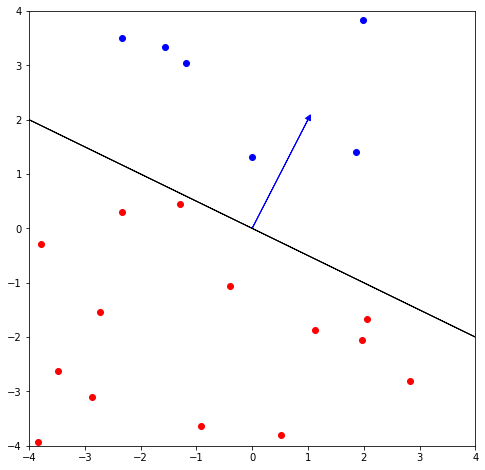

In [29]:
P = np.array([[1, 2]])  # Define a single plane. You may change the direction

# Get a new plane perpendicular to P. We use a rotation matrix
PT = np.dot([[0, 1], [-1, 0]], P.T).T  

fig, ax1 = plt.subplots(figsize=(8, 8)) # Create a plot with custom size

plot_vectors([P], colors=['b'], axes=[2, 2], ax=ax1) # Plot the plane P as a vector

# Plot the plane P as a 2 vectors. 
# We scale by 2 just to get the arrows outside the current box
plot_vectors([PT * 4, PT * -4], colors=['k', 'k'], axes=[4, 4], ax=ax1)

# Plot 20 random points. 
for i in range(0, 20):
    v1 = np.array(np.random.uniform(-4, 4, 2)) # Get a pair of random numbers between -4 and 4 
    side_of_plane = np.sign(np.dot(P, v1.T)) # Get the sign of the dot product with P
    # Color the points depending on the sign of the result of np.dot(P, point.T)
    if side_of_plane == 1:
        ax1.plot([v1[0]], [v1[1]], 'bo') # Plot a blue point
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro') # Plot a red point

plt.show()


Now, let us see what is inside the code that color the points. 

In [30]:
P = np.array([[1, 1]])      # Single plane
v1 = np.array([[1, 2]])     # Sample point 1
v2 = np.array([[-1, 1]])    # Sample point 2
v3 = np.array([[-2, -1]])   # Sample point 3

In [31]:
np.dot(P, v1.T)

array([[3]])

In [32]:
np.dot(P, v2.T)

array([[0]])

In [33]:
np.dot(P, v3.T)

array([[-3]])

The function below checks in which side of the plane P is located the vector `v`

In [35]:
def side_of_plane(P, v):
    dot = np.dot(P, v.T)
    sign_of_dot = np.sign(dot)
    sign_of_dot_scalar = sign_of_dot.item()
    return sign_of_dot_scalar

In [36]:
side_of_plane(P, v1) # In which side is [1, 2]

1

In [37]:
side_of_plane(P, v2) # In which side is [-1, 1]

0

In [38]:
side_of_plane(P, v3) # In which side is [-2, -1]

-1

In [41]:
np.sign(0)

0

## Hash Function with multiple planes

In the following section, we are going to define a hash function with a list of three custom planes in 2D.

In [40]:
P1 = np.array([[1, 1]])   # First plane 2D
P2 = np.array([[-1, 1]])  # Second plane 2D
P3 = np.array([[-1, -1]]) # Third plane 2D
P_l = [P1, P2, P3]  # List of arrays. It is the multi plane

pp.pprint(P_l)

# Vector to search
v = np.array([[2, 2]])

pp.pprint(v)

[array([[1, 1]]), array([[-1,  1]]), array([[-1, -1]])]
array([[2, 2]])


The next function creates a hash value based on a set of planes. The output value is a combination of the side of the plane where the vector is localized with respect to the collection of planes.

We can think of this list of planes as a set of basic hash functions, each of which can produce only 1 or 0 as output.

In [42]:
def hash_multi_plane(P_l, v):
    """hash_value = 求和 2^i * h_i"""
    hash_value = 0
    for i, P in enumerate(P_l):
        sign = side_of_plane(P,v)
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i
        
    return hash_value

In [43]:
hash_multi_plane(P_l, v) # Find the number of the plane that containes this value

3

## Random Planes

In the cell below, we create a set of three random planes

In [44]:
np.random.seed(0)
num_dimensions = 2 # is 300 in assignment
num_planes = 3 # is 10 in assignment
random_planes_matrix = np.random.normal(
                       size=(num_planes,
                             num_dimensions))
print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [45]:
v = np.array([[2, 2]])

The next function is similar to the `side_of_plane()` function, but it evaluates more than a plane each time. The result is an array with the side of the plane of `v`, for the set of planes `P`# 

In [46]:
def side_of_plane_matrix(P,v):
    dot=np.dot(P,v.T)
    sign_of_dot=np.sign(dot)
    return sign_of_dot

Get the side of the plane of the vector `[2, 2]` for the set of random planes. 

In [47]:
side_1 = side_of_plane_matrix(random_planes_matrix,v)

side_1

array([[1.],
       [1.],
       [1.]])

Now, let us use the former function to define our multiplane hash function

In [48]:
def hash_multi_plane_matrix(P,v,num_planes):
    
    # Get the side of planes for P and v
    sizes_matrix=side_of_plane_matrix(P,v)
    
    hash_value=0
    
    for i in range(num_planes):
        sign=sizes_matrix[i].item()
        hash_i=1 if sign >=0 else 0
        hash_value+=2**i*hash_i
        
    return hash_value

Print the bucket hash for the vector `v = [2, 2]`. 

In [49]:
hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

7

#### Note
This showed you how to make one set of random planes.  You will make multiple sets of random planes in order to make the approximate nearest neighbors more accurate.

## Document vectors

Before we finish this lab, remember that you can represent a document as a vector by adding up the word vectors for the words inside the document. In this example, our embedding contains only three words, each represented by a 3D array.

In [50]:
word_embedding = {"I": np.array([1,0,1]),
                   "love": np.array([-1,0,1]),
                   "learning": np.array([1,0,1])
                  }
words_in_document = ['I', 'love', 'learning', 'not_a_word']
document_embedding = np.array([0,0,0])
for word in words_in_document:
    document_embedding += word_embedding.get(word,0)
    
print(document_embedding)

[1 0 3]


**Congratulations! You've now completed this lab on hash functions and multiplanes!**

# Assignment 4 - Naive Machine Translation and LSH

You will now implement your first machine translation system and then you
will see how locality sensitive hashing works. Let's get started by importing
the required functions!

If you are running this notebook in your local computer, don't forget to
download the twitter samples and stopwords from nltk.

```
nltk.download('stopwords')
nltk.download('twitter_samples')
```

In [52]:
import pdb
import pickle
import string
import time
import gensim
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import scipy
from gensim.models import KeyedVectors
from nltk.corpus import stopwords,twitter_samples
from nltk.tokenize import TweetTokenizer

from os import getcwd

# 1. The word embeddings data for English and French words

Write a program that translates English to French.

## The data

The full dataset for English embeddings is about 3.64 gigabytes, and the French
embeddings are about 629 megabytes. To prevent the Coursera workspace from
crashing, we've extracted a subset of the embeddings for the words that you'll
use in this assignment.

If you want to run this on your local computer and use the full dataset,
you can download the
* English embeddings from Google code archive word2vec
[look for GoogleNews-vectors-negative300.bin.gz](https://code.google.com/archive/p/word2vec/)
    * You'll need to unzip the file first.
* and the French embeddings from
[cross_lingual_text_classification](https://github.com/vjstark/crosslingual_text_classification).
    * in the terminal, type (in one line)
    `curl -o ./wiki.multi.fr.vec https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.fr.vec`

Then copy-paste the code below and run it.

```python
# Use this code to download and process the full dataset on your local computer

from gensim.models import KeyedVectors

en_embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)
fr_embeddings = KeyedVectors.load_word2vec_format('./wiki.multi.fr.vec')


# loading the english to french dictionaries
en_fr_train = get_dict('en-fr.train.txt')
print('The length of the english to french training dictionary is', len(en_fr_train))
en_fr_test = get_dict('en-fr.test.txt')
print('The length of the english to french test dictionary is', len(en_fr_train))

english_set = set(en_embeddings.vocab)
french_set = set(fr_embeddings.vocab)
en_embeddings_subset = {}
fr_embeddings_subset = {}
french_words = set(en_fr_train.values())

for en_word in en_fr_train.keys():
    fr_word = en_fr_train[en_word]
    if fr_word in french_set and en_word in english_set:
        en_embeddings_subset[en_word] = en_embeddings[en_word]
        fr_embeddings_subset[fr_word] = fr_embeddings[fr_word]


for en_word in en_fr_test.keys():
    fr_word = en_fr_test[en_word]
    if fr_word in french_set and en_word in english_set:
        en_embeddings_subset[en_word] = en_embeddings[en_word]
        fr_embeddings_subset[fr_word] = fr_embeddings[fr_word]


pickle.dump( en_embeddings_subset, open( "en_embeddings.p", "wb" ) )
pickle.dump( fr_embeddings_subset, open( "fr_embeddings.p", "wb" ) )
```

In [60]:
en_embeddings_subset = pickle.load(open("en_embeddings.p","rb"))
fr_embeddings_subset = pickle.load(open("fr_embeddings.p","rb"))

#### Look at the data

* en_embeddings_subset: the key is an English word, and the vaule is a
300 dimensional array, which is the embedding for that word.
```
'the': array([ 0.08007812,  0.10498047,  0.04980469,  0.0534668 , -0.06738281, ....
```

* fr_embeddings_subset: the key is an French word, and the vaule is a 300
dimensional array, which is the embedding for that word.
```
'la': array([-6.18250e-03, -9.43867e-04, -8.82648e-03,  3.24623e-02,...
```

#### Load two dictionaries mapping the English to French words
* A training dictionary
* and a testing dictionary.

In [61]:
def get_dict(file_name):
    my_file = pd.read_csv(file_name, delimiter=' ')
    
    etof={}
    
    for i in range(len(my_file)):
        en = my_file.iloc[i][0]
        fr = my_file.iloc[i][1]
        etof[en] = fr
        
    return etof

In [68]:
en_fr_train = get_dict('en-fr.train.txt')
print('The length of the English to French training dictionary is', len(en_fr_train))
en_fr_test = get_dict('en-fr.test.txt')
print('The length of the English to French test dictionary is', len(en_fr_train))
type(en_fr_train)

The length of the English to French training dictionary is 5000
The length of the English to French test dictionary is 5000


dict

#### Looking at the English French dictionary

* `en_fr_train` is a dictionary where the key is the English word and the value
is the French translation of that English word.
```
{'the': 'la',
 'and': 'et',
 'was': 'était',
 'for': 'pour',
```

* `en_fr_test` is similar to `en_fr_train`, but is a test set.  We won't look at it
until we get to testing.

## 1.1 Generate embedding and transform matrices

#### Exercise: Translating English dictionary to French by using embeddings

You will now implement a function `get_matrices`, which takes the loaded data
and returns matrices `X` and `Y`.

Inputs:
- `en_fr` : English to French dictionary
- `en_embeddings` : English to embeddings dictionary
- `fr_embeddings` : French to embeddings dictionary

Returns:
- Matrix `X` and matrix `Y`, where each row in X is the word embedding for an
english word, and the same row in Y is the word embedding for the French
version of that English word.

<div style="width:image width px; font-size:100%; text-align:center;">
<img src='X_to_Y.jpg' alt="alternate text" width="width" height="height" style="width:800px;height:200px;" /> Figure 2 </div>

Use the `en_fr` dictionary to ensure that the ith row in the `X` matrix
corresponds to the ith row in the `Y` matrix.

**Instructions**: Complete the function `get_matrices()`:
* Iterate over English words in `en_fr` dictionary.
* Check if the word have both English and French embedding.

In [64]:
def get_matrices(en_fr,french_vecs,english_vecs):
    """
    Input:
        en_fr: English to French dictionary
        french_vecs: French words to their corresponding word embeddings.
        english_vecs: English words to their corresponding word embeddings.
    Output: 
        X: a matrix where the columns are the English embeddings.
        Y: a matrix where the columns correspong to the French embeddings.
        R: the projection matrix that minimizes the F norm ||X R -Y||^2.
    """
    
    # X_l and Y_l are lists of the english and french word embeddings
    X_l=list()
    Y_l=list()
    
    # get the english words (the keys in the dictionary) and store in a set()
    english_set=english_vecs.keys()
    
    # get the french words (the keys in the dictionary) and store in a set()
    french_set=french_vecs.keys()
    
    # store the french words that are part of the english-french dictionary
    french_words=set(en_fr.values())
    
    for en_word,fr_word in en_fr.items():
        if fr_word in french_set and en_word in english_set:
            en_vec=english_vecs[en_word]
            
            fr_vec=french_vecs[fr_word]
            
            X_l.append(en_vec)
            
            Y_l.append(fr_vec)
    
    X=np.vstack(X_l)
    
    Y=np.vstack(Y_l)
    
    return X,Y

In [65]:
X_train, Y_train = get_matrices(
    en_fr_train, fr_embeddings_subset, en_embeddings_subset)
X_train

array([[ 0.08007812,  0.10498047,  0.04980469, ...,  0.00366211,
         0.04760742, -0.06884766],
       [ 0.02600098, -0.00189209,  0.18554688, ..., -0.12158203,
         0.22167969, -0.02197266],
       [-0.01177979, -0.04736328,  0.04467773, ...,  0.07128906,
        -0.03491211,  0.02416992],
       ...,
       [-0.17089844,  0.17871094, -0.06494141, ..., -0.10644531,
        -0.31640625, -0.09326172],
       [-0.21875   ,  0.09179688,  0.03637695, ..., -0.015625  ,
        -0.27148438,  0.14941406],
       [-0.00418091,  0.0703125 , -0.04516602, ..., -0.16015625,
         0.09326172, -0.15039062]], dtype=float32)

# 2. Translations

<div style="width:image width px; font-size:100%; text-align:center;"><img src='e_to_f.jpg' alt="alternate text" width="width" height="height" style="width:700px;height:200px;" /> Figure 1 </div>

Write a program that translates English words to French words using word embeddings and vector space models. 

## 2.1 Translation as linear transformation of embeddings

Given dictionaries of English and French word embeddings you will create a transformation matrix `R`
* Given an English word embedding, $\mathbf{e}$, you can multiply $\mathbf{eR}$ to get a new word embedding $\mathbf{f}$.
    * Both $\mathbf{e}$ and $\mathbf{f}$ are [row vectors](https://en.wikipedia.org/wiki/Row_and_column_vectors).
* You can then compute the nearest neighbors to `f` in the french embeddings and recommend the word that is most similar to the transformed word embedding.

### Describing translation as the minimization problem

Find a matrix `R` that minimizes the following equation. 

$$\arg \min _{\mathbf{R}}\| \mathbf{X R} - \mathbf{Y}\|_{F}\tag{1} $$

### Frobenius norm

The Frobenius norm of a matrix $A$ (assuming it is of dimension $m,n$) is defined as the square root of the sum of the absolute squares of its elements:

$$\|\mathbf{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}\tag{2}$$

### Actual loss function
In the real world applications, the Frobenius norm loss:

$$\| \mathbf{XR} - \mathbf{Y}\|_{F}$$

is often replaced by it's squared value divided by $m$:

$$ \frac{1}{m} \|  \mathbf{X R} - \mathbf{Y} \|_{F}^{2}$$

where $m$ is the number of examples (rows in $\mathbf{X}$).

* The same R is found when using this loss function versus the original Frobenius norm.
* The reason for taking the square is that it's easier to compute the gradient of the squared Frobenius.
* The reason for dividing by $m$ is that we're more interested in the average loss per embedding than the  loss for the entire training set.
    * The loss for all training set increases with more words (training examples),
    so taking the average helps us to track the average loss regardless of the size of the training set.
    
##### [Optional] Detailed explanation why we use norm squared instead of the norm:
<details>
<summary>
    Click for optional details
</summary>
    <p>
        <ul>
            <li>The norm is always nonnegative (we're summing up absolute values), and so is the square. 
            <li> When we take the square of all non-negative (positive or zero) numbers, the order of the data is preserved.  
            <li> For example, if 3 > 2, 3^2 > 2^2
            <li> Using the norm or squared norm in gradient descent results in the same <i>location</i> of the minimum.
            <li> Squaring cancels the square root in the Frobenius norm formula. Because of the <a href="https://en.wikipedia.org/wiki/Chain_rule"> chain rule</a>, we would have to do more calculations if we had a square root in our expression for summation.
            <li> Dividing the function value by the positive number doesn't change the optimum of the function, for the same reason as described above.
            <li> We're interested in transforming English embedding into the French. Thus, it is more important to measure average loss per embedding than the loss for the entire dictionary (which increases as the number of words in the dictionary increases).
        </ul>
    </p>

### Exercise: Implementing translation mechanism described in this section.

#### Step 1: Computing the loss
* The loss function will be squared Frobenoius norm of the difference between
matrix and its approximation, divided by the number of training examples $m$.
* Its formula is:
$$ L(X, Y, R)=\frac{1}{m}\sum_{i=1}^{m} \sum_{j=1}^{n}\left( a_{i j} \right)^{2}$$

where $a_{i j}$ is value in $i$th row and $j$th column of the matrix $\mathbf{XR}-\mathbf{Y}$.


#### Instructions: complete the `compute_loss()` function

* Compute the approximation of `Y` by matrix multiplying `X` and `R`
* Compute difference `XR - Y`
* Compute the squared Frobenius norm of the difference and divide it by $m$.

In [69]:
def compute_loss(X,Y,R):
    '''
    Inputs: 
        X: a matrix of dimension (m,n) where the columns are the English embeddings.
        Y: a matrix of dimension (m,n) where the columns correspong to the French embeddings.
        R: a matrix of dimension (n,n) - transformation matrix from English to French vector space embeddings.
    Outputs:
        L: a matrix of dimension (m,n) - the value of the loss function for given X, Y and R.
    '''
    
    m=X.shape[0]
    
    diff=np.dot(X,R)-Y
    
    diff_squared=diff**2
    
    sum_diff_squared=np.sum(diff_squared)
    
    loss=sum_diff_squared/m
    
    return loss

### Step 2: Computing the gradient of loss in respect to transform matrix R

* Calculate the gradient of the loss with respect to transform matrix `R`.
* The gradient is a matrix that encodes how much a small change in `R`
affect the change in the loss function.
* The gradient gives us the direction in which we should decrease `R`
to minimize the loss.
* $m$ is the number of training examples (number of rows in $X$).
* The formula for the gradient of the loss function $𝐿(𝑋,𝑌,𝑅)$ is:

$$\frac{d}{dR}𝐿(𝑋,𝑌,𝑅)=\frac{d}{dR}\Big(\frac{1}{m}\| X R -Y\|_{F}^{2}\Big) = \frac{2}{m}X^{T} (X R - Y)$$

**Instructions**: Complete the `compute_gradient` function below.

In [70]:
def compute_gradient(X,Y,R):
    '''
    Inputs: 
        X: a matrix of dimension (m,n) where the columns are the English embeddings.
        Y: a matrix of dimension (m,n) where the columns correspong to the French embeddings.
        R: a matrix of dimension (n,n) - transformation matrix from English to French vector space embeddings.
    Outputs:
        g: a matrix of dimension (n,n) - gradient of the loss function L for given X, Y and R.
    '''
    m=X.shape[0]
    
    gradient=np.dot(X.T,np.dot(X,R)-Y)*(2/m)
    
    return gradient

### Step 3: Finding the optimal R with gradient descent algorithm

#### Gradient descent

[Gradient descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html) is an iterative algorithm which is used in searching for the optimum of the function. 
* Earlier, we've mentioned that the gradient of the loss with respect to the matrix encodes how much a tiny change in some coordinate of that matrix affect the change of loss function.
* Gradient descent uses that information to iteratively change matrix `R` until we reach a point where the loss is minimized. 

Training with a fixed number of iterations

Most of the time we iterate for a fixed number of training steps rather than iterating until the loss falls below a threshold.

##### OPTIONAL: explanation for fixed number of iterations
<details>
<summary>
    <font size="3" color="darkgreen"><b>click here for detailed discussion</b></font>
</summary>
<p>
<ul>
    <li> You cannot rely on training loss getting low -- what you really want is the validation loss to go down, or validation accuracy to go up. And indeed - in some cases people train until validation accuracy reaches a threshold, or -- commonly known as "early stopping" -- until the validation accuracy starts to go down, which is a sign of over-fitting.
    </li>
    <li>
    Why not always do "early stopping"? Well, mostly because well-regularized models on larger data-sets never stop improving. Especially in NLP, you can often continue training for months and the model will continue getting slightly and slightly better. This is also the reason why it's hard to just stop at a threshold -- unless there's an external customer setting the threshold, why stop, where do you put the threshold?
    </li>
    <li>Stopping after a certain number of steps has the advantage that you know how long your training will take - so you can keep some sanity and not train for months. You can then try to get the best performance within this time budget. Another advantage is that you can fix your learning rate schedule -- e.g., lower the learning rate at 10% before finish, and then again more at 1% before finishing. Such learning rate schedules help a lot, but are harder to do if you don't know how long you're training.
    </li>
</ul>
</p>

Pseudocode:
1. Calculate gradient $g$ of the loss with respect to the matrix $R$.
2. Update $R$ with the formula:
$$R_{\text{new}}= R_{\text{old}}-\alpha g$$

Where $\alpha$ is the learning rate, which is a scalar.

#### Instructions: Implement `align_embeddings()`

In [72]:
def align_embeddings(X,Y,train_steps=100,learning_rate=0.0003):
    np.random.seed(129)
    
    R = np.random.rand(X.shape[1],X.shape[1])
    
    for i in range(train_steps):
        if i%25 == 0:
            print("loss at iteration {} is {:.4f}".format(i,compute_loss(X,Y,R)))
        
        gradient = compute_gradient(X,Y,R)
        
        R -= learning_rate*gradient
        
    return R

In [73]:
# Test
np.random.seed(129)
m = 10
n = 5
X = np.random.rand(m, n)
Y = np.random.rand(m, n) * .1
R = align_embeddings(X, Y)

loss at iteration 0 is 3.7242
loss at iteration 25 is 3.6283
loss at iteration 50 is 3.5350
loss at iteration 75 is 3.4442


## Calculate transformation matrix R

Using those the training set, find the transformation matrix $\mathbf{R}$ by calling the function `align_embeddings()`.

In [74]:
R_train = align_embeddings(X_train, Y_train, train_steps=400, learning_rate=0.8)

loss at iteration 0 is 963.0146
loss at iteration 25 is 97.8292
loss at iteration 50 is 26.8329
loss at iteration 75 is 9.7893
loss at iteration 100 is 4.3776
loss at iteration 125 is 2.3281
loss at iteration 150 is 1.4480
loss at iteration 175 is 1.0338
loss at iteration 200 is 0.8251
loss at iteration 225 is 0.7145
loss at iteration 250 is 0.6534
loss at iteration 275 is 0.6185
loss at iteration 300 is 0.5981
loss at iteration 325 is 0.5858
loss at iteration 350 is 0.5782
loss at iteration 375 is 0.5735


## 2.2 Testing the translation

### k-Nearest neighbors algorithm

[k-Nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) 
* k-NN is a method which takes a vector as input and finds the other vectors in the dataset that are closest to it. 
* The 'k' is the number of "nearest neighbors" to find (e.g. k=2 finds the closest two neighbors).

### Searching for the translation embedding
Since we're approximating the translation function from English to French embeddings by a linear transformation matrix $\mathbf{R}$, most of the time we won't get the exact embedding of a French word when we transform embedding $\mathbf{e}$ of some particular English word into the French embedding space. 
* This is where $k$-NN becomes really useful! By using $1$-NN with $\mathbf{eR}$ as input, we can search for an embedding $\mathbf{f}$ (as a row) in the matrix $\mathbf{Y}$ which is the closest to the transformed vector $\mathbf{eR}$

### Cosine similarity
Cosine similarity between vectors $u$ and $v$ calculated as the cosine of the angle between them.
The formula is 

$$\cos(u,v)=\frac{u\cdot v}{\left\|u\right\|\left\|v\right\|}$$

* $\cos(u,v)$ = $1$ when $u$ and $v$ lie on the same line and have the same direction.
* $\cos(u,v)$ is $-1$ when they have exactly opposite directions.
* $\cos(u,v)$ is $0$ when the vectors are orthogonal (perpendicular) to each other.

**Exercise**: Complete the function `nearest_neighbor()`

Inputs:
* Vector `v`,
* A set of possible nearest neighbors `candidates`
* `k` nearest neighbors to find.
* The distance metric should be based on cosine similarity.
* `cosine_similarity` function is already implemented and imported for you. It's arguments are two vectors and it returns the cosine of the angle between them.
* Iterate over rows in `candidates`, and save the result of similarities between current row and vector `v` in a python list. Take care that similarities are in the same order as row vectors of `candidates`.
* Now you can use [numpy argsort]( https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html#numpy.argsort) to sort the indices for the rows of `candidates`.

In [75]:
def cosine_similarity(A,B):
    cos=0
    
    dot=np.dot(A,B)
    norma=np.linalg.norm(A)
    normb=np.linalg.norm(B)
    
    return dot/(norma*normb)

In [76]:
def knn(v,candidates,k=1):
    """
    Input:
      - v, the vector you are going find the nearest neighbor for
      - candidates: a set of vectors where we will find the neighbors
      - k: top k nearest neighbors to find
    Output:
      - k_idx: the indices of the top k closest vectors in sorted form
    """
    
    similarity_l=[]
    
    for row in candidates:
        cos_similarity=cosine_similarity(v,row)
        similarity_l.append(cos_similarity)
        
    sorted_ids=np.argsort(similarity_l)
    
    k_idx=sorted_ids[-k:]
    
    return k_idx

In [77]:
# Test
v = np.array([1, 0, 1])
candidates = np.array([[1, 0, 5], [-2, 5, 3], [2, 0, 1], [6, -9, 5], [9, 9, 9]])
print(candidates[knn(v, candidates, 3)])

[[9 9 9]
 [1 0 5]
 [2 0 1]]


### Test your translation and compute its accuracy

**Exercise**:
Complete the function `test_vocabulary` which takes in English
embedding matrix $X$, French embedding matrix $Y$ and the $R$
matrix and returns the accuracy of translations from $X$ to $Y$ by $R$.

* Iterate over transformed English word embeddings and check if the
closest French word vector belongs to French word that is the actual
translation.
* Obtain an index of the closest French embedding by using
`nearest_neighbor` (with argument `k=1`), and compare it to the index
of the English embedding you have just transformed.
* Keep track of the number of times you get the correct translation.
* Calculate accuracy as $$\text{accuracy}=\frac{\#(\text{correct predictions})}{\#(\text{total predictions})}$$

In [78]:
def test_vocabulary(X,Y,R):
    '''
    Input:
        X: a matrix where the columns are the English embeddings.
        Y: a matrix where the columns correspong to the French embeddings.
        R: the transform matrix which translates word embeddings from
        English to French word vector space.
    Output:
        accuracy: for the English to French capitals
    '''
    pred=np.dot(X,R)
    num_correct=0
    
    for i in range(len(pred)):
        pred_idx=knn(pred[i],Y)
        
        if pred_idx==i:
            num_correct+=1
    
    accuracy=num_correct/len(pred)
    
    return accuracy

Let's see how is your translation mechanism working on the unseen data:

In [79]:
X_val, Y_val = get_matrices(en_fr_test, fr_embeddings_subset, en_embeddings_subset)

In [80]:
acc = test_vocabulary(X_val, Y_val, R_train)  # this might take a minute or two
print(f"accuracy on test set is {acc:.3f}")

accuracy on test set is 0.557


You managed to translate words from one language to another language
without ever seing them with almost 56% accuracy by using some basic
linear algebra and learning a mapping of words from one language to another!

# 3. LSH and document search

In this part of the assignment, you will implement a more efficient version
of k-nearest neighbors using locality sensitive hashing.
You will then apply this to document search.

* Process the tweets and represent each tweet as a vector (represent a
document with a vector embedding).
* Use locality sensitive hashing and k nearest neighbors to find tweets
that are similar to a given tweet.

In [81]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
all_tweets = all_positive_tweets + all_negative_tweets

### 3.2 Getting the document embeddings

#### Bag-of-words (BOW) document models
Text documents are sequences of words.
* The ordering of words makes a difference. For example, sentences "Apple pie is
better than pepperoni pizza." and "Pepperoni pizza is better than apple pie"
have opposite meanings due to the word ordering.
* However, for some applications, ignoring the order of words can allow
us to train an efficient and still effective model.
* This approach is called Bag-of-words document model.

#### Document embeddings
* Document embedding is created by summing up the embeddings of all words
in the document.
* If we don't know the embedding of some word, we can ignore that word.

**Exercise**:
Complete the `get_document_embedding()` function.
* The function `get_document_embedding()` encodes entire document as a "document" embedding.
* It takes in a docoument (as a string) and a dictionary, `en_embeddings`
* It processes the document, and looks up the corresponding embedding of each word.
* It then sums them up and returns the sum of all word vectors of that processed tweet.

In [83]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string
import re

In [85]:
def process_tweet(tweet):
    stemmer=PorterStemmer()
    stopwords_english=stopwords.words('english')
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    tokenizer=TweetTokenizer(preserve_case=False,strip_handles=True,
                             reduce_len=True)
    
    tweet_tokens=tokenizer.tokenize(tweet)
    
    tweets_clean=[]
    
    for word in tweet_tokens:
        if word not in stopwords_english and\
            word not in string.punctuation:
            stem_word=stemmer.stem(word)
            tweets_clean.append(stem_word)
    
    return tweets_clean

In [86]:
def get_document_embedding(tweet,en_embeddings):    
    '''
    Input:
        - tweet: a string
        - en_embeddings: a dictionary of word embeddings
    Output:
        - tweet_embedding: a
    '''
    
    doc_embedding=np.zeros(300)
    
    processed_doc=process_tweet(tweet)
    
    for word in processed_doc:
        doc_embedding+=en_embeddings.get(word,0)
        
    return doc_embedding

In [87]:
# Test

custom_tweet = "RT @Twitter @chapagain Hello There! Have a great day. :) #good #morning http://chapagain.com.np"

tweet_embedding = get_document_embedding(custom_tweet, en_embeddings_subset)
tweet_embedding[-5:]

array([-0.00268555, -0.15378189, -0.55761719, -0.07216644, -0.32263184])

#### Store all document vectors into a dictionary
Now, let's store all the tweet embeddings into a dictionary.
Implement `get_document_vecs()`

In [88]:
def get_document_vecs(all_docs,en_embeddings):
    '''
    Input:
        - all_docs: list of strings - all tweets in our dataset.
        - en_embeddings: dictionary with words as the keys and their embeddings as the values.
    Output:
        - document_vec_matrix: matrix of tweet embeddings.
        - ind2Doc_dict: dictionary with indices of tweets in vecs as keys and their embeddings as the values.
    '''
    
    ind2Doc_dict={}
    
    document_vec_l=[]
    
    for i,doc in enumerate(all_docs):
        
        # get the document embedding of the tweet
        doc_embedding=get_document_embedding(doc,en_embeddings)
        
        ind2Doc_dict[i]=doc_embedding
        
        document_vec_l.append(doc_embedding)
        
    document_vec_matrix=np.vstack(document_vec_l)
    
    return document_vec_matrix,ind2Doc_dict

In [89]:
document_vecs, ind2Tweet = get_document_vecs(all_tweets, en_embeddings_subset)

In [90]:
print(f"length of dictionary {len(ind2Tweet)}")
print(f"shape of document_vecs {document_vecs.shape}")

length of dictionary 10000
shape of document_vecs (10000, 300)


## 3.3 Looking up the tweets.

Now you have a vector of dimension (m,d) where `m` is the number of tweets
(10,000) and `d` is the dimension of the embeddings (300).  Now you
will input a tweet, and use cosine similarity to see which tweet in our
corpus is similar to your tweet.

In [91]:
my_tweet = 'i am sad'
process_tweet(my_tweet)
tweet_embedding = get_document_embedding(my_tweet, en_embeddings_subset)

In [92]:
idx = np.argmax(cosine_similarity(document_vecs, tweet_embedding))
print(all_tweets[idx])

@zoeeylim sad sad sad kid :( it's ok I help you watch the match HAHAHAHAHA


## 3.4 Finding the most similar tweets with LSH

You will now implement locality sensitive hashing (LSH) to identify the most similar tweet.
* Instead of looking at all 10,000 vectors, you can just search a subset to find
its nearest neighbors.

Let's say your data points are plotted like this:


<div style="width:image width px; font-size:100%; text-align:center;"><img src='one.png' alt="alternate text" width="width" height="height" style="width:400px;height:200px;" /> Figure 3 </div>

You can divide the vector space into regions and search within one region for nearest neighbors of a given vector.

<div style="width:image width px; font-size:100%; text-align:center;"><img src='four.png' alt="alternate text" width="width" height="height" style="width:400px;height:200px;" /> Figure 4 </div>

In [93]:
N_VECS = len(all_tweets)       # This many vectors.
N_DIMS = len(ind2Tweet[1])     # Vector dimensionality.
print(f"Number of vectors is {N_VECS} and each has {N_DIMS} dimensions.")

Number of vectors is 10000 and each has 300 dimensions.


#### Choosing the number of planes

* Each plane divides the space to $2$ parts.
* So $n$ planes divide the space into $2^{n}$ hash buckets.
* We want to organize 10,000 document vectors into buckets so that every bucket has about $~16$ planes.
* For that we need $\frac{10000}{16}=625$ buckets.
* We're interested in $n$, number of planes, so that $2^{n}= 625$. Now, we can calculate $n=\log_{2}625 = 9.29 \approx 10$.

In [94]:
# The number of planes. We use log2(256) to have ~16 vectors/bucket.
N_PLANES = 10
# Number of times to repeat the hashing to improve the search.
N_UNIVERSES = 25

## 3.5 Getting the hash number for a vector

For each vector, we need to get a unique number associated to that vector in order to assign it to a "hash bucket".

### Hyperlanes in vector spaces
* In $3$-dimensional vector space, the hyperplane is a regular plane. In $2$ dimensional vector space, the hyperplane is a line.
* Generally, the hyperplane is subspace which has dimension $1$ lower than the original vector space has.
* A hyperplane is uniquely defined by its normal vector.
* Normal vector $n$ of the plane $\pi$ is the vector to which all vectors in the plane $\pi$ are orthogonal (perpendicular in $3$ dimensional case).

### Using Hyperplanes to split the vector space
We can use a hyperplane to split the vector space into $2$ parts.
* All vectors whose dot product with a plane's normal vector is positive are on one side of the plane.
* All vectors whose dot product with the plane's normal vector is negative are on the other side of the plane.

### Encoding hash buckets
* For a vector, we can take its dot product with all the planes, then encode this information to assign the vector to a single hash bucket.
* When the vector is pointing to the opposite side of the hyperplane than normal, encode it by 0.
* Otherwise, if the vector is on the same side as the normal vector, encode it by 1.
* If you calculate the dot product with each plane in the same order for every vector, you've encoded each vector's unique hash ID as a binary number, like [0, 1, 1, ... 0].

### Implementing hash buckets

We've initialized hash table `hashes` for you. It is list of `N_UNIVERSES` matrices, each describes its own hash table. Each matrix has `N_DIMS` rows and `N_PLANES` columns. Every column of that matrix is a `N_DIMS`-dimensional normal vector for each of `N_PLANES` hyperplanes which are used for creating buckets of the particular hash table.

*Exercise*: Your task is to complete the function `hash_value_of_vector` which places vector `v` in the correct hash bucket.

* First multiply your vector `v`, with a corresponding plane. This will give you a vector of dimension $(1,\text{N_planes})$.
* You will then convert every element in that vector to 0 or 1.
* You create a hash vector by doing the following: if the element is negative, it becomes a 0, otherwise you change it to a 1.
* You then compute the unique number for the vector by iterating over `N_PLANES`
* Then you multiply $2^i$ times the corresponding bit (0 or 1).
* You will then store that sum in the variable `hash_value`.

**Intructions:** Create a hash for the vector in the function below.
Use this formula:

$$ hash = \sum_{i=0}^{N-1} \left( 2^{i} \times h_{i} \right) $$

#### Create the sets of planes
* Create multiple (25) sets of planes (the planes that divide up the region).
* You can think of these as 25 separate ways of dividing up the vector space with a different set of planes.
* Each element of this list contains a matrix with 300 rows (the word vector have 300 dimensions), and 10 columns (there are 10 planes in each "universe").

In [96]:
np.random.seed(0)
planes_l = [np.random.normal(size=(N_DIMS, N_PLANES))
            for _ in range(N_UNIVERSES)]
planes_l

[array([[ 1.76405235,  0.40015721,  0.97873798, ..., -0.15135721,
         -0.10321885,  0.4105985 ],
        [ 0.14404357,  1.45427351,  0.76103773, ..., -0.20515826,
          0.3130677 , -0.85409574],
        [-2.55298982,  0.6536186 ,  0.8644362 , ..., -0.18718385,
          1.53277921,  1.46935877],
        ...,
        [-0.95051795, -0.46399642, -0.17724662, ...,  1.07230065,
         -0.50370944, -0.58701629],
        [-0.37817805,  0.8528891 , -2.14811848, ...,  0.44768322,
         -0.66219144, -1.57760707],
        [-0.34056003, -1.30322008,  0.46675065, ..., -0.19240421,
         -1.21251574, -0.08059852]]),
 array([[ 1.59327362,  0.5687224 , -0.11448705, ...,  0.09942199,
         -1.53061624,  0.32762318],
        [ 0.27919649, -0.37705121,  0.004175  , ..., -0.01155552,
          0.83949067, -0.17392993],
        [-2.81066805, -0.15065364, -0.48104402, ...,  1.57030391,
         -0.62594311,  0.47232789],
        ...,
        [ 2.4529964 , -1.87363434, -0.06810869, ..., -

In [98]:
# UNQ_C17 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def hash_value_of_vector(v, planes):
    """Create a hash for a vector; hash_id says which random hash to use.
    Input:
        - v:  vector of tweet. It's dimension is (1, N_DIMS)
        - planes: matrix of dimension (N_DIMS, N_PLANES) - the set of planes that divide up the region
    Output:
        - res: a number which is used as a hash for your vector

    """
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # for the set of planes,
    # calculate the dot product between the vector and the matrix containing the planes
    # remember that planes has shape (300, 10)
    # The dot product will have the shape (1,10)
    dot_product = np.dot(v,planes)
    
    # get the sign of the dot product (1,10) shaped vector
    sign_of_dot_product = np.sign(dot_product)
    
    # set h to be false (eqivalent to 0 when used in operations) if the sign is negative,
    # and true (equivalent to 1) if the sign is positive (1,10) shaped vector
    h = sign_of_dot_product>=0

    # remove extra un-used dimensions (convert this from a 2D to a 1D array)
    h = np.squeeze(h)

    # initialize the hash value to 0
    hash_value = 0

    n_planes = planes.shape[1]
    for i in range(n_planes):
        # increment the hash value by 2^i * h_i
        hash_value += np.power(2,i)*h[i]
    ### END CODE HERE ###

    # cast hash_value as an integer
    hash_value = int(hash_value)

    return hash_value


In [99]:
np.random.seed(0)
idx = 0
planes = planes_l[idx]  # get one 'universe' of planes to test the function
vec = np.random.rand(1, 300)
print(f" The hash value for this vector,",
      f"and the set of planes at index {idx},",
      f"is {hash_value_of_vector(vec, planes)}")

 The hash value for this vector, and the set of planes at index 0, is 768


## 3.5 Creating a hash table

Given that you have a unique number for each vector (or tweet), You now want to create a hash table. You need a hash table, so that given a hash_id, you can quickly look up the corresponding vectors. This allows you to reduce your search by a significant amount of time.

<div style="width:image width px; font-size:100%; text-align:center;"><img src='table.png' alt="alternate text" width="width" height="height" style="width:500px;height:200px;" />  </div>

We have given you the `make_hash_table` function, which maps the tweet vectors to a bucket and stores the vector there. It returns the `hash_table` and the `id_table`. The `id_table` allows you know which vector in a certain bucket corresponds to what tweet.

In [100]:
# UNQ_C19 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# This is the code used to create a hash table: feel free to read over it
def make_hash_table(vecs, planes):
    """
    Input:
        - vecs: list of vectors to be hashed.
        - planes: the matrix of planes in a single "universe", with shape (embedding dimensions, number of planes).
    Output:
        - hash_table: dictionary - keys are hashes, values are lists of vectors (hash buckets)
        - id_table: dictionary - keys are hashes, values are list of vectors id's
                            (it's used to know which tweet corresponds to the hashed vector)
    """
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

    # number of planes is the number of columns in the planes matrix
    num_of_planes = planes.shape[1]

    # number of buckets is 2^(number of planes)
    num_buckets = 2**num_of_planes

    # create the hash table as a dictionary.
    # Keys are integers (0,1,2.. number of buckets)
    # Values are empty lists
    hash_table = {i:[] for i in range(num_buckets)}

    # create the id table as a dictionary.
    # Keys are integers (0,1,2... number of buckets)
    # Values are empty lists
    id_table = {i:[] for i in range(num_buckets)}

    # for each vector in 'vecs'
    for i, v in enumerate(vecs):

        # calculate the hash value for the vector
        h = hash_value_of_vector(v,planes)
        #print(h)
        #print('******')
        # store the vector into hash_table at key h,
        # by appending the vector v to the list at key h
        hash_table[h].append(v)

        # store the vector's index 'i' (each document is given a unique integer 0,1,2...)
        # the key is the h, and the 'i' is appended to the list at key h
        id_table[h].append(i)

    ### END CODE HERE ###

    return hash_table, id_table

In [101]:
np.random.seed(0)
planes = planes_l[0]  # get one 'universe' of planes to test the function
vec = np.random.rand(1, 300)
print(planes.shape,'')

tmp_hash_table, tmp_id_table = make_hash_table(document_vecs, planes)
#print(tmp_hash_table[0])
#print(tmp_id_table[0])
print(f"The hash table at key 0 has {len(tmp_hash_table[0])} document vectors")
print(f"The id table at key 0 has {len(tmp_id_table[0])}")
print(f"The first 5 document indices stored at key 0 of are {tmp_id_table[0][0:5]}")

(300, 10) 
The hash table at key 0 has 3 document vectors
The id table at key 0 has 3
The first 5 document indices stored at key 0 of are [3276, 3281, 3282]


### 3.6 Creating all hash tables

You can now hash your vectors and store them in a hash table that
would allow you to quickly look up and search for similar vectors.
Run the cell below to create the hashes. By doing so, you end up having
several tables which have all the vectors. Given a vector, you then
identify the buckets in all the tables.  You can then iterate over the
buckets and consider much fewer vectors. The more buckets you use, the
more accurate your lookup will be, but also the longer it will take.

In [102]:
# Creating the hashtables
hash_tables = []
id_tables = []
for universe_id in range(N_UNIVERSES):  # there are 25 hashes
    print('working on hash universe #:', universe_id)
    planes = planes_l[universe_id]
    hash_table, id_table = make_hash_table(document_vecs, planes)
    hash_tables.append(hash_table)
    id_tables.append(id_table)

working on hash universe #: 0
working on hash universe #: 1
working on hash universe #: 2
working on hash universe #: 3
working on hash universe #: 4
working on hash universe #: 5
working on hash universe #: 6
working on hash universe #: 7
working on hash universe #: 8
working on hash universe #: 9
working on hash universe #: 10
working on hash universe #: 11
working on hash universe #: 12
working on hash universe #: 13
working on hash universe #: 14
working on hash universe #: 15
working on hash universe #: 16
working on hash universe #: 17
working on hash universe #: 18
working on hash universe #: 19
working on hash universe #: 20
working on hash universe #: 21
working on hash universe #: 22
working on hash universe #: 23
working on hash universe #: 24


### Approximate K-NN

Implement approximate K nearest neighbors using locality sensitive hashing,
to search for documents that are similar to a given document at the
index `doc_id`.

##### Inputs
* `doc_id` is the index into the document list `all_tweets`.
* `v` is the document vector for the tweet in `all_tweets` at index `doc_id`.
* `planes_l` is the list of planes (the global variable created earlier).
* `k` is the number of nearest neighbors to search for.
* `num_universes_to_use`: to save time, we can use fewer than the total
number of available universes.  By default, it's set to `N_UNIVERSES`,
which is $25$ for this assignment.

The `approximate_knn` function finds a subset of candidate vectors that
are in the same "hash bucket" as the input vector 'v'.  Then it performs
the usual k-nearest neighbors search on this subset (instead of searching
through all 10,000 tweets).

In [105]:
# This is the code used to do the fast nearest neighbor search. Feel free to go over it
def approximate_knn(doc_id, v, planes_l, k=1, num_universes_to_use=N_UNIVERSES):
    """Search for k-NN using hashes."""
    assert num_universes_to_use <= N_UNIVERSES

    # Vectors that will be checked as p0ossible nearest neighbor
    vecs_to_consider_l = list()

    # list of document IDs
    ids_to_consider_l = list()

    # create a set for ids to consider, for faster checking if a document ID already exists in the set
    ids_to_consider_set = set()

    # loop through the universes of planes
    for universe_id in range(num_universes_to_use):

        # get the set of planes from the planes_l list, for this particular universe_id
        planes = planes_l[universe_id]

        # get the hash value of the vector for this set of planes
        hash_value = hash_value_of_vector(v, planes)

        # get the hash table for this particular universe_id
        hash_table = hash_tables[universe_id]

        # get the list of document vectors for this hash table, where the key is the hash_value
        document_vectors_l = hash_table[hash_value]

        # get the id_table for this particular universe_id
        id_table = id_tables[universe_id]

        # get the subset of documents to consider as nearest neighbors from this id_table dictionary
        new_ids_to_consider = id_table[hash_value]

        ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

        # remove the id of the document that we're searching
        if doc_id in new_ids_to_consider:
            new_ids_to_consider.remove(doc_id)
            print(f"removed doc_id {doc_id} of input vector from new_ids_to_search")

        # loop through the subset of document vectors to consider
        for i, new_id in enumerate(new_ids_to_consider):

            # if the document ID is not yet in the set ids_to_consider...
            if new_id not in ids_to_consider_set:
                # access document_vectors_l list at index i to get the embedding
                # then append it to the list of vectors to consider as possible nearest neighbors
                document_vector_at_i = document_vectors_l[i]
                

                # append the new_id (the index for the document) to the list of ids to consider
                vecs_to_consider_l.append(document_vector_at_i)
                ids_to_consider_l.append(new_id)
                # also add the new_id to the set of ids to consider
                # (use this to check if new_id is not already in the IDs to consider)
                ids_to_consider_set.add(new_id)

        ### END CODE HERE ###

    # Now run k-NN on the smaller set of vecs-to-consider.
    print("Fast considering %d vecs" % len(vecs_to_consider_l))

    # convert the vecs to consider set to a list, then to a numpy array
    vecs_to_consider_arr = np.array(vecs_to_consider_l)

    # call nearest neighbors on the reduced list of candidate vectors
    nearest_neighbor_idx_l = knn(v, vecs_to_consider_arr, k=k)
    print(nearest_neighbor_idx_l)
    print(ids_to_consider_l)
    # Use the nearest neighbor index list as indices into the ids to consider
    # create a list of nearest neighbors by the document ids
    nearest_neighbor_ids = [ids_to_consider_l[idx]
                            for idx in nearest_neighbor_idx_l]

    return nearest_neighbor_ids


In [106]:
#document_vecs, ind2Tweet
doc_id = 0
doc_to_search = all_tweets[doc_id]
vec_to_search = document_vecs[doc_id]

In [107]:
# Sample
nearest_neighbor_ids = approximate_knn(doc_id, vec_to_search, planes_l, k=3, num_universes_to_use=5)

removed doc_id 0 of input vector from new_ids_to_search
removed doc_id 0 of input vector from new_ids_to_search
removed doc_id 0 of input vector from new_ids_to_search
removed doc_id 0 of input vector from new_ids_to_search
removed doc_id 0 of input vector from new_ids_to_search
Fast considering 77 vecs
[26  8  0]
[51, 105, 154, 160, 195, 253, 1876, 2478, 701, 1205, 1300, 1581, 1681, 1685, 2714, 4149, 4157, 4232, 4753, 5684, 6821, 9239, 213, 339, 520, 1729, 2140, 2786, 3028, 3162, 3259, 3654, 4002, 4047, 5263, 5492, 5538, 5649, 5656, 5729, 7076, 9063, 9207, 9789, 9927, 207, 254, 1302, 1480, 1815, 2298, 2620, 2741, 3525, 3837, 4704, 4871, 5327, 5386, 5923, 6033, 6371, 6762, 7288, 7472, 7774, 7790, 7947, 8061, 8224, 8276, 8892, 9096, 9153, 9175, 9323, 9740]


In [108]:
print(f"Nearest neighbors for document {doc_id}")
print(f"Document contents: {doc_to_search}")
print("")

for neighbor_id in nearest_neighbor_ids:
    print(f"Nearest neighbor at document id {neighbor_id}")
    print(f"document contents: {all_tweets[neighbor_id]}")

Nearest neighbors for document 0
Document contents: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

Nearest neighbor at document id 2140
document contents: @PopsRamjet come one, every now and then is not so bad :)
Nearest neighbor at document id 701
document contents: With the top cutie of Bohol :) https://t.co/Jh7F6U46UB
Nearest neighbor at document id 51
document contents: #FollowFriday @France_Espana @reglisse_menthe @CCI_inter for being top engaged members in my community this week :)


# 4 Conclusion
Congratulations - Now you can look up vectors that are similar to the
encoding of your tweet using LSH!